In [1]:
import numpy as np
import pandas as pd 
import math
import seaborn as sns
import matplotlib as plt
%matplotlib inline


In [2]:
df = pd.read_csv(r"C:\Users\satya\Desktop\spacemissions.csv")

In [3]:
df.head()

,Company Name,Country,Month,Year,Status Rocket,Million$,Status Mission
0,SpaceX,USA,Aug,2020,StatusActive,50,Success
1,CASC,China,Aug,2020,StatusActive,29.75,Success
2,SpaceX,USA,Aug,2020,StatusActive,NaN,Success
3,Roscosmos,Kazakhstan,Jul,2020,StatusActive,65,Success
4,ULA,USA,Jul,2020,StatusActive,145,Success


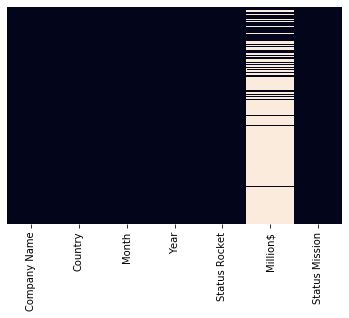

In [4]:
sns.heatmap(df.isnull(),yticklabels= False, cbar= False)

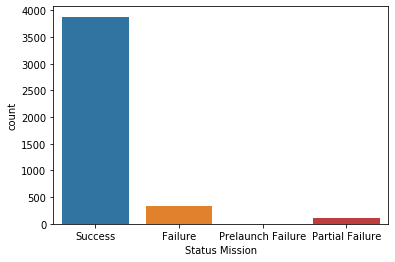

In [5]:
sns.countplot('Status Mission',data=df)

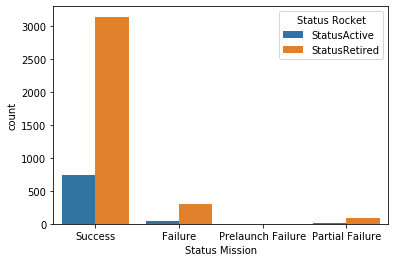

In [6]:
sns.countplot('Status Mission',hue='Status Rocket',data=df)

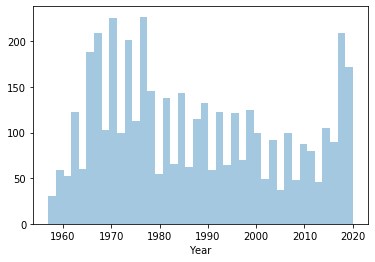

In [7]:
sns.distplot(df['Year'],bins=40,kde=False)

In [8]:
## Data Cleaning

In [9]:
df.drop('Million$',axis=1,inplace = True)

In [10]:
df.head()

,Company Name,Country,Month,Year,Status Rocket,Status Mission
0,SpaceX,USA,Aug,2020,StatusActive,Success
1,CASC,China,Aug,2020,StatusActive,Success
2,SpaceX,USA,Aug,2020,StatusActive,Success
3,Roscosmos,Kazakhstan,Jul,2020,StatusActive,Success
4,ULA,USA,Jul,2020,StatusActive,Success


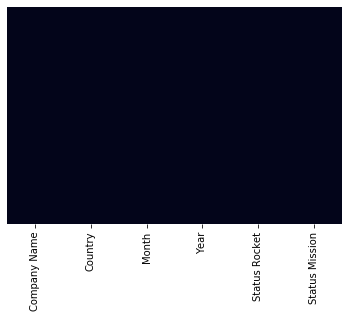

In [11]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False)

In [12]:
## Converting categorical values

In [13]:
len(df['Country'])


4324

In [14]:
rocket=pd.get_dummies(df['Status Rocket'],drop_first=True)
rocket.head()


,StatusRetired
0,0
1,0
2,0
3,0
4,0


In [15]:
status=pd.get_dummies(df['Status Mission'])
status.head()

,Failure,Partial Failure,Prelaunch Failure,Success
0,0,0,0,1
1,0,0,0,1
2,0,0,0,1
3,0,0,0,1
4,0,0,0,1


In [16]:
df.drop(['Status Rocket','Status Mission'],axis =1, inplace=True)

In [17]:
df.head()

,Company Name,Country,Month,Year
0,SpaceX,USA,Aug,2020
1,CASC,China,Aug,2020
2,SpaceX,USA,Aug,2020
3,Roscosmos,Kazakhstan,Jul,2020
4,ULA,USA,Jul,2020


In [18]:
df=pd.concat([df,rocket],axis=1)

In [19]:
df.head()

,Company Name,Country,Month,Year,StatusRetired
0,SpaceX,USA,Aug,2020,0
1,CASC,China,Aug,2020,0
2,SpaceX,USA,Aug,2020,0
3,Roscosmos,Kazakhstan,Jul,2020,0
4,ULA,USA,Jul,2020,0


In [20]:
df=pd.concat([df,status],axis=1)

In [21]:
df.head()

,Company Name,Country,Month,Year,StatusRetired,Failure,Partial Failure,Prelaunch Failure,Success
0,SpaceX,USA,Aug,2020,0,0,0,0,1
1,CASC,China,Aug,2020,0,0,0,0,1
2,SpaceX,USA,Aug,2020,0,0,0,0,1
3,Roscosmos,Kazakhstan,Jul,2020,0,0,0,0,1
4,ULA,USA,Jul,2020,0,0,0,0,1


In [22]:
from sklearn.preprocessing import LabelEncoder

lb_make = LabelEncoder()
df["Month"] = lb_make.fit_transform(df["Month"])


In [23]:
df["Country"] = lb_make.fit_transform(df["Country"])
df["Company Name"] = lb_make.fit_transform(df["Company Name"])
df["Year"] = lb_make.fit_transform(df["Year"])

In [24]:
df.head()

,Company Name,Country,Month,Year,StatusRetired,Failure,Partial Failure,Prelaunch Failure,Success
0,46,15,1,63,0,0,0,0,1
1,7,3,1,63,0,0,0,0,1
2,46,15,1,63,0,0,0,0,1
3,42,9,5,63,0,0,0,0,1
4,48,15,5,63,0,0,0,0,1


## Train Test Split

In [27]:
## Building the logistic regression model

In [25]:
df.drop('Success',axis=1).head()

,Company Name,Country,Month,Year,StatusRetired,Failure,Partial Failure,Prelaunch Failure
0,46,15,1,63,0,0,0,0
1,7,3,1,63,0,0,0,0
2,46,15,1,63,0,0,0,0
3,42,9,5,63,0,0,0,0
4,48,15,5,63,0,0,0,0


In [26]:
df['Success'].head()

0    1
1    1
2    1
3    1
4    1
Name: Success, dtype: uint8

In [27]:
df.drop(['Failure','Partial Failure','Prelaunch Failure'],axis=1, inplace= True)


In [28]:
df.head()

,Company Name,Country,Month,Year,StatusRetired,Success
0,46,15,1,63,0,1
1,7,3,1,63,0,1
2,46,15,1,63,0,1
3,42,9,5,63,0,1
4,48,15,5,63,0,1


In [29]:
from sklearn.model_selection import train_test_split

In [30]:
X_train, X_test, Y_train, Y_test = train_test_split(df.drop('Success',axis=1),df['Success'],test_size=0.30,random_state=101)

In [31]:
## Training and Predicting

In [32]:
from sklearn.linear_model import LogisticRegression

In [33]:
logmodel = LogisticRegression()
logmodel.fit(X_train,Y_train)

LogisticRegression()

In [34]:
predictions = logmodel.predict(X_test)

In [35]:
from sklearn.metrics import confusion_matrix

In [36]:
accuracy= confusion_matrix(Y_test,predictions)

In [37]:
accuracy

array([[   0,  123],
       [   0, 1175]], dtype=int64)

In [38]:
from sklearn.metrics import accuracy_score

In [39]:
accuracy=accuracy_score(Y_test,predictions)
accuracy

0.9052388289676425

In [40]:
predictions

array([1, 1, 1, ..., 1, 1, 1], dtype=uint8)